## Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
%load_ext autoreload
%autoreload 2

## Assignment

### Pre-processing

In [2]:
# In a single cell because it takes a long time and doesn't need to be ran everytime
y, x = load_data(train=True) # Load data
y_indexes, x_test = load_data(train=False)

In [12]:
x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, np.random.seed())
x_tr = replace_min_999_by_col_mean(x_tr) # Handle invalid values
x_te = replace_min_999_by_col_mean(x_te)

x_tr, mean_x_tr, std_x_tr = standardize(x_tr) # Standardize x
x_te, mean_x_te, std_x_te = standardize(x_te)

#tx_tr = build_poly(x_tr, 2) # build polynomial expansion (with bias) TODO CAUSES NANs AND HAS TO BE BEFORE STD
#tx_te = build_poly(x_te, 2)

### Linear regression using gradient descent

In [15]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD, epochs, step, gamma = np.zeros(61), 20, 100, 1e-4
loss_tr_GD = []
loss_te_GD = []
for i in range((int)(epochs)):
    w_GD, loss_tr = mean_squared_error_gd(y_tr, tx_tr, w_GD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_GD)
    loss_tr_GD.append(loss_tr)
    loss_te_GD.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.15207089129562132 Test loss: 0.15231460002260397
Epoch 1 : Training loss: 0.14370885047369059 Test loss: 0.14392064258782813
Epoch 2 : Training loss: 0.1381721659470409 Test loss: 0.13833070536027908
Epoch 3 : Training loss: 0.13402914105611657 Test loss: 0.13414677512942272
Epoch 4 : Training loss: 0.1307963923428317 Test loss: 0.13088276468333299
Epoch 5 : Training loss: 0.12822361915695374 Test loss: 0.12828484733999615
Epoch 6 : Training loss: 0.12615053388117725 Test loss: 0.12619120585669014
Epoch 7 : Training loss: 0.12446412414701198 Test loss: 0.12448820861366373
Epoch 8 : Training loss: 0.12308108418543773 Test loss: 0.1230921648483997
Epoch 9 : Training loss: 0.12193856621535495 Test loss: 0.12193984865836123
Epoch 10 : Training loss: 0.12098845782323572 Test loss: 0.12098273898824997
Epoch 11 : Training loss: 0.12019351449071265 Test loss: 0.12018317116412355
Epoch 12 : Training loss: 0.11952462639428035 Test loss: 0.11951162950661316
Epoch 13 : T

#### Plotting the resulting losses

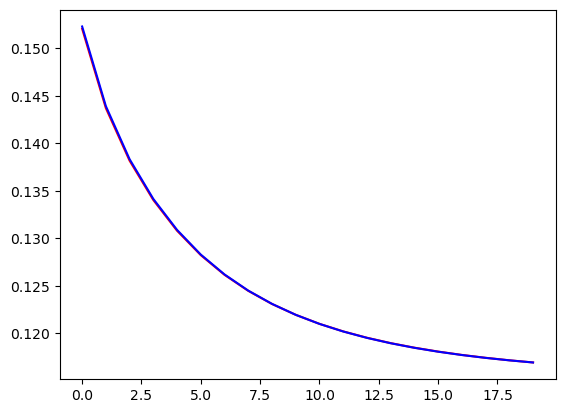

In [17]:
plt.plot(range(len(loss_tr_GD)), loss_tr_GD, c='red')
plt.plot(range(len(loss_te_GD)), loss_te_GD, c='blue')

#### Calculating the accuracy on the test set (with predictions = -1 or 1)

In [18]:
accuracy = compute_accuracy(tx_te, y_te, w_GD, 0)
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 34.292%


In [19]:
x_test = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test, mean_x_test, std_x_test = standardize(x_test) # Standardize x

tx_test = build_poly(x_test, 2) # build polynomial expansion (with bias) TODO check poly exp works

y_hat = build_prediction(tx_test, w_GD, 0.4) # threshold of 0.4 found experimentally - mention in report
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv")

### Linear regression using stochastic gradient descent

In [21]:
w_SGD, epochs, step, gamma = np.zeros(61), 10, 100, 1e-4
for i in range((int)(epochs)):
    w_SGD, loss_tr = mean_squared_error_sgd(y_tr, tx_tr, w_SGD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_SGD)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.16023061895149335 Test loss: 0.15290355767082628
Epoch 1 : Training loss: 0.19136618989615975 Test loss: 0.15613011860824733
Epoch 2 : Training loss: 0.18533968739943577 Test loss: 0.14658033493516615
Epoch 3 : Training loss: 0.2046858823789182 Test loss: 0.14587288297535161
Epoch 4 : Training loss: 0.18351915915385614 Test loss: 0.13459699184958407
Epoch 5 : Training loss: 0.17960861954050683 Test loss: 0.1303445093235465
Epoch 6 : Training loss: 0.20663021519073124 Test loss: 0.12891441889365768
Epoch 7 : Training loss: 0.21229363356775335 Test loss: 0.12714846599312188
Epoch 8 : Training loss: 0.24728734917784523 Test loss: 0.12587483070852795
Epoch 9 : Training loss: 0.18751276974851133 Test loss: 0.1285200374576835


#### Calculating the accuracy on the test set (with predictions = 0 or 1)

In [22]:
y_hat_cont = tx_te@w_SGD
y_hat = [1 if yi > 0.40 else 0 for yi in y_hat_cont]
accuracy = 1-abs(y_te-y_hat).mean()
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 64.97800000000001%


### Least squares

In [23]:
w_LS, loss_tr = least_squares(y_tr, tx_tr)
loss_te = compute_mse(y_te, tx_te, w_LS)
print(f"Training loss: {loss_tr}\nTest loss: {loss_te}")

Training loss: 0.11257695856591776
Test loss: 0.19532723606021726


In [24]:
y_hat_cont = tx_te@w_LS
y_hat = [1 if yi > 0.45 else 0 for yi in y_hat_cont]
accuracy = 1-abs(y_te-y_hat).mean()
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 53.205999999999996%


### Ridge regression

In [25]:
lambda_ = 0.1
w_REG, loss_tr = ridge_regression(y_tr, tx_tr, lambda_)
print(f"Training loss: {loss_tr}\n")

Training loss: 0.11382698184738475



In [26]:
y_hat_cont = tx_te@w_REG
y_hat = [1 if yi > 0.44 else 0 for yi in y_hat_cont]
accuracy = 1-abs(y_te-y_hat).mean()
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 65.16999999999999%


### Logistic regression using gradient descent or SGD (y ∈ {0, 1})

In [30]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD_log, epochs, step, gamma = np.zeros(61), 100, 50, 1e-2
loss_tr_GD_log = []
loss_te_GD_log = []
for i in range((int)(epochs)):
    w_GD_log, loss_tr = logistic_regression(y_tr, tx_tr, w_GD_log, step, gamma) # TODO this leads to some NaNs
    loss_te = compute_log_loss(y_te, tx_te, w_GD_log)
    loss_tr_GD_log.append(loss_tr)
    loss_te_GD_log.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.6493604363450861 Test loss: 0.6496570359509891
Epoch 1 : Training loss: 0.6460065635306081 Test loss: 0.6463286953649794
Epoch 2 : Training loss: 0.6452360467491102 Test loss: 0.6455572838911496
Epoch 3 : Training loss: 0.6448999849220696 Test loss: 0.6452291269348456
Epoch 4 : Training loss: 0.6446826227149361 Test loss: 0.6450235118755325
Epoch 5 : Training loss: 0.6445175321641884 Test loss: 0.6448692990478804
Epoch 6 : Training loss: 0.6443840203721461 Test loss: 0.6447446419807523
Epoch 7 : Training loss: 0.6442729724173362 Test loss: 0.6446406442514742
Epoch 8 : Training loss: 0.644179243188401 Test loss: 0.644552632022324
Epoch 9 : Training loss: 0.6440994018704608 Test loss: 0.6444775714143599
Epoch 10 : Training loss: 0.6440309168639311 Test loss: 0.6444132078125301
Epoch 11 : Training loss: 0.6439718146146486 Test loss: 0.6443577494757108
Epoch 12 : Training loss: 0.6439205128376433 Test loss: 0.6443097320549002
Epoch 13 : Training loss: 0.643875724

KeyboardInterrupt: 

#### Plotting the resulting losses

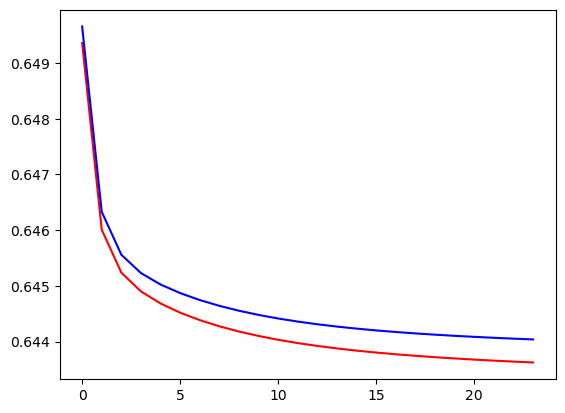

In [31]:
plt.plot(range(len(loss_tr_GD_log)), loss_tr_GD_log, c='red')
plt.plot(range(len(loss_te_GD_log)), loss_te_GD_log, c='blue')

#### Calculating the accuracy on the test set (with predictions = -1 or 1)

In [32]:
accuracy = compute_accuracy_log(tx_te, y_te, w_GD_log, threshold=0.5)
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 65.70400000000001%


In [33]:
x_test = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test, mean_x_test, std_x_test = standardize(x_test) # Standardize x

tx_test = build_poly(x_test, 2) # TODO check it works

y_hat = build_prediction_log(tx_test, w_GD_log, threshold=0.5, minus_one = True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv")

### Regularized logistic regression using gradient descent or SGD (y ∈ {0, 1}, with regularization term λ∥w∥**2)